In [6]:
##Task 1: 
#data extraction
import yfinance as yf
import pandas as pd

# Define the list of Nifty sector indices
nifty_sectors = ['^CNXAUTO',  '^CNXENERGY',  '^CNXIT', '^CNXMEDIA', '^CNXMETAL',  '^CNXREALTY']

# Define a dictionary to store the data
sector_data = {}

# Download data for each sector index
for sector in nifty_sectors:
    ticker = yf.Ticker(sector)
    sector_data[sector] = ticker.history(period="10y")

# Convert the dictionary to a DataFrame
sector_data_df = {sector: data['Close'] for sector, data in sector_data.items()}
sector_data_df = pd.DataFrame(sector_data_df)

# Save the data to a CSV file
sector_data_df.to_csv('nifty_sector_data.csv')


In [7]:
# Now we have got nifty sector data of last 10 years in the csv file for given 6 sectors

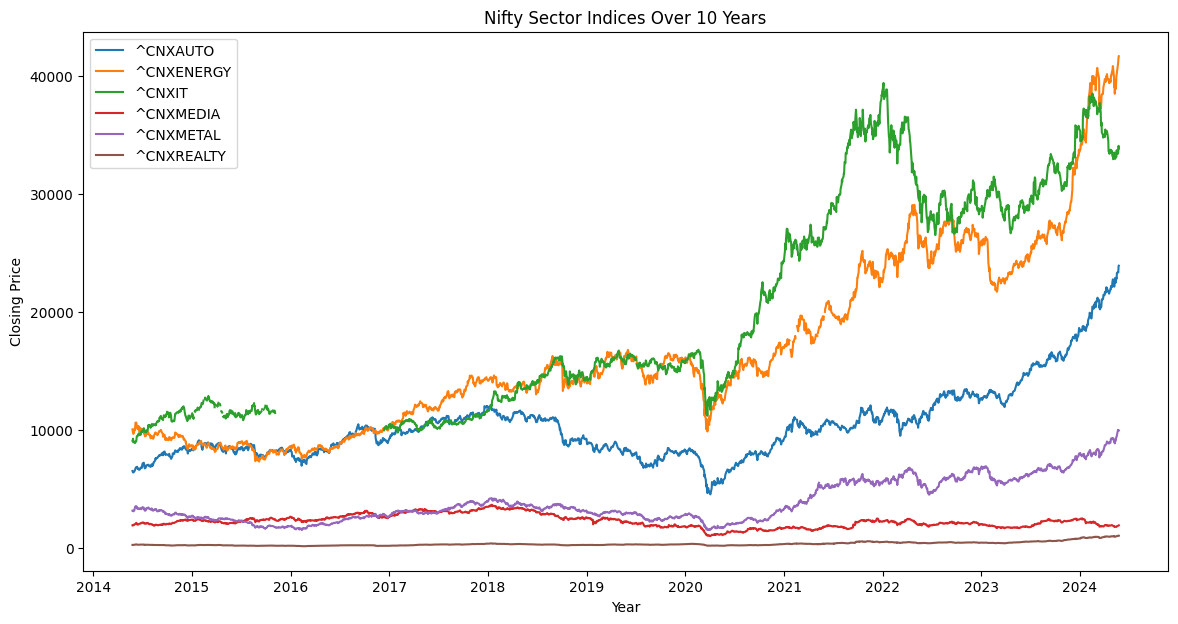

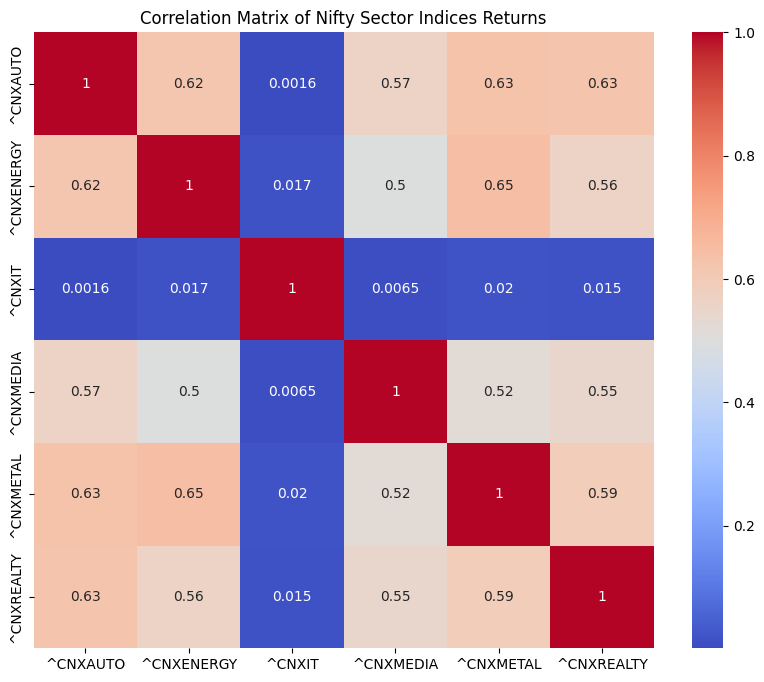

          ^CNXAUTO   ^CNXENERGY       ^CNXIT    ^CNXMEDIA    ^CNXMETAL  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2456.000000   
mean      0.000625     0.000666     0.003733     0.000149     0.000630   
std       0.013780     0.013080     0.166037     0.017255     0.017965   
min      -0.138478    -0.097121    -0.927285    -0.163741    -0.116017   
25%      -0.006220    -0.006241    -0.004947    -0.008324    -0.008779   
50%       0.000868     0.001056     0.000000     0.000556     0.000870   
75%       0.007636     0.008296     0.006685     0.009057     0.011209   
max       0.104063     0.086344     8.148806     0.143976     0.098422   

        ^CNXREALTY  
count  2456.000000  
mean      0.000773  
std       0.019159  
min      -0.116044  
25%      -0.009334  
50%       0.001537  
75%       0.011287  
max       0.086569  


In [8]:
##Task 2: Exploratory Data Analysis (EDA)
#Performing EDA involves visualizing and summarizing the data to understand underlying patterns. We will focus on:

#Trend analysis
#Correlation between sector indices and macroeconomic variables
#Statistical summaries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sector data
sector_data_df = pd.read_csv('nifty_sector_data.csv', index_col='Date', parse_dates=True)

# Plot the closing prices for each sector
plt.figure(figsize=(14, 7))
for sector in sector_data_df.columns:
    plt.plot(sector_data_df[sector], label=sector)
plt.legend()
plt.title('Nifty Sector Indices Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# Calculate returns
sector_returns = sector_data_df.pct_change().dropna()

# Display the correlation matrix
correlation_matrix = sector_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nifty Sector Indices Returns')
plt.show()

# Summary statistics
summary_stats = sector_returns.describe()
print(summary_stats)


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.00024380398031523777


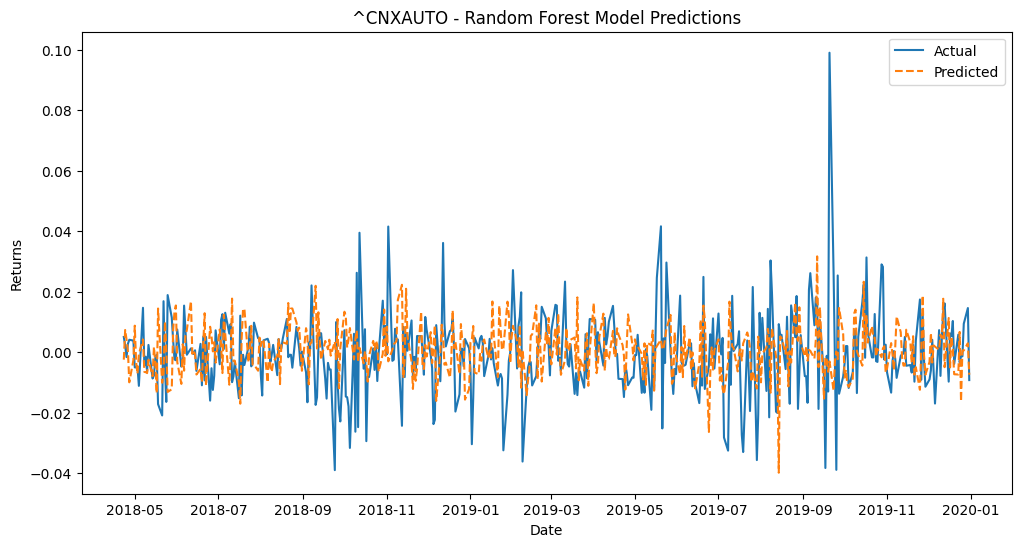

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select a sector to model
sector = '^CNXAUTO'

# Fetch data from Yahoo Finance
sector_data = yf.download(sector, start='2010-01-01', end='2020-01-01')

# Use the 'Close' price for modeling
sector_data_df = sector_data['Close']

# Ensure the index has a frequency (business days)
sector_data_df = sector_data_df.asfreq('B')

# Interpolate missing values if necessary
if sector_data_df.isnull().sum() > 0:
    sector_data_df = sector_data_df.interpolate()

# Calculate returns for the sector index
sector_returns = sector_data_df.pct_change().dropna()

# Prepare the feature matrix (X) and target vector (y)
# For simplicity, we'll use lagged returns as features (you can add more features as needed)
X = sector_returns.shift(1).dropna().values.reshape(-1, 1)
y = sector_returns[1:].values  # Align y with shifted X

# Split into training and testing sets (80% for training, 20% for testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, rf_predictions)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame for plotting
test_index = sector_returns.index[train_size+1:]  # Align index with test data
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions}, index=test_index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.title(f'{sector} - Random Forest Model Predictions')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()
